# Simple Keras example of MNIST classifier

Keras, Tensorflow

**Features:**
- Code at start avoids full GPU memory allocation. Some interesting threads about this:
-- https://stackoverflow.com/questions/34199233/how-to-prevent-tensorflow-from-allocating-the-totality-of-a-gpu-memory
-- https://kobkrit.com/using-allow-growth-memory-option-in-tensorflow-and-keras-dc8c8081bc96
    

**TODO:**
- Avoid deprecated sentences
- Use own code for training (customize)



**Configure tensorflow & keras to avoid allocate all GPU memory**

In [1]:
from keras.callbacks import ModelCheckpoint
from keras.models import Model, load_model, save_model, Sequential
from keras.layers import Dense, Activation, Dropout, Input, Masking, TimeDistributed, LSTM, Conv1D
from keras.layers import GRU, Bidirectional, BatchNormalization, Reshape
from keras.optimizers import Adam
from keras.backend.tensorflow_backend import set_session
import tensorflow as tf

tf.test.is_gpu_available(cuda_only=False,min_cuda_compute_capability=None)
config = tf.ConfigProto()
config.gpu_options.allow_growth = True  
config.log_device_placement = True 
sess = tf.Session(config=config)
set_session(sess) 


Using TensorFlow backend.


**Import data**

In [2]:
import keras as k
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


**Show sample image and label**

4


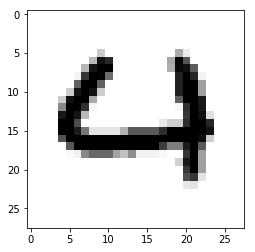

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[60], cmap=plt.cm.binary)
print(y_train[60])

**Training configuration parameters**

In [5]:
batch_size = 256
num_classes = 10
epochs = 5

dropout_rate = 0.2


**Training and Test data reshape**

In [6]:
from keras.models import Sequential
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = k.utils.to_categorical(y_train, num_classes)
y_test = k.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


**Define net architecture, compile and train model**

In [1]:
from __future__ import print_function
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
model.summary()

Using TensorFlow backend.


NameError: name 'Sequential' is not defined

**Check loss and accuracy of trained model**

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06655799589799717
Test accuracy: 0.9785


**Calculate predictions for test set**

In [9]:
predictions = model.predict(x_test)

**Check prediction on single example (random index)**

index:  3107
7


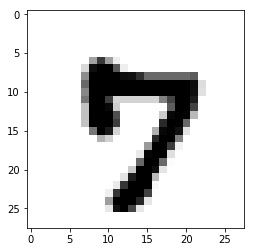

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time


(x_train_printable, y_train_printable), (x_test_printable, y_test_printable) = mnist.load_data()

rnd =  random.randint(1,10000)
print('index: ', rnd)
plt.imshow(x_test_printable[rnd], cmap=plt.cm.binary)
print(np.argmax(predictions[rnd]))
